In [79]:
import os
import numpy as np
root_path = '/mnt/data/WQ/LoRAT/inference/exp_Argos_4_30'
BS_index = [0, 1, 2, 3, 5]
path_list_W0 = [os.path.join(root_path, f'W0_Client{i}', 'all_snr_list.npy') for i in BS_index]
path_list_FT = [os.path.join(root_path, f'FT{i}_Client{i}', 'all_snr_list.npy') for i in BS_index]
snr_list_W0 = [np.load(path) for path in path_list_W0]
snr_list_FT = [np.load(path) for path in path_list_FT]

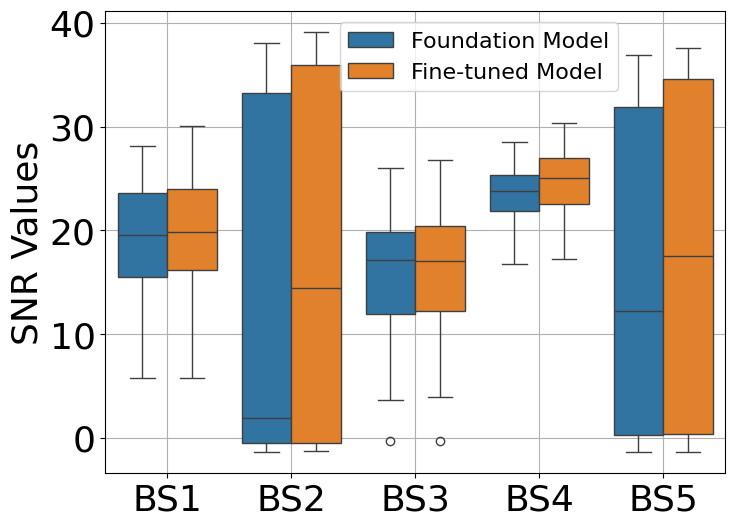

In [80]:
from tkinter import font
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 26})
plt.rcParams['pdf.fonttype'] = 42  
# Create data for plotting
data = []
for i, (w0, ft) in enumerate(zip(snr_list_W0, snr_list_FT)):
    client_num = BS_index[i]
    data.extend([{'Client': f'BS{i+1}', 'Type': 'Foundation Model', 'SNR': val} for val in w0])
    data.extend([{'Client': f'BS{i+1}', 'Type': 'Fine-tuned Model', 'SNR': val} for val in ft])

# Convert to DataFrame
df = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Client', y='SNR', hue='Type', data=df)
# plt.title('SNR Comparison between W0 and FT')
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('SNR Values')
plt.legend(title='')
plt.legend(bbox_to_anchor=(0.36, 1), loc='upper left', fontsize=16)
plt.grid(True)
plt.savefig('snr_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()


In [81]:
methods_snr_path = '/mnt/data/WQ/LoRAT/plots/data/exp_mimo_snr.mat'
import scipy.io as sio
methods_snr = sio.loadmat(methods_snr_path)

keys_to_remove = ['__header__', '__version__', '__globals__', 'data_nerf2']
for key in keys_to_remove:
    if key in methods_snr:
        methods_snr.pop(key)

no_est_path = '/mnt/data/WQ/LoRAT/inference/exp_Argos_4_30/NoEst_Client4/all_snr_list.npy'
no_est_snr = np.load(no_est_path)
methods_snr['NoEst'] = no_est_snr

LoRAT_2source_path = '/mnt/data/WQ/LoRAT/inference/exp_Argos_4_30/FT4_2source_Client4/all_snr_list.npy'
LoRAT_2source_snr = np.load(LoRAT_2source_path)
methods_snr['LoRAT'] = LoRAT_2source_snr

# LoRAT_3source_path = '/mnt/data/WQ/LoRAT/inference/exp_Argos_4_30/FT4_3source_Client4/all_snr_list.npy'
# LoRAT_3source_snr = np.load(LoRAT_3source_path)
# methods_snr['LoRAT_3source'] = LoRAT_3source_snr

# W0_path = '/mnt/data/WQ/LoRAT/inference/exp_Argos_4_30/W0_Client4/all_snr_list.npy'
# W0_snr = np.load(W0_path)
# methods_snr['W0'] = W0_snr

# FT0_path = '/mnt/data/WQ/LoRAT/inference/exp_Argos_4_30/FT0_Client4/all_snr_list.npy'
# FT0_snr = np.load(FT0_path)
# methods_snr['FT0'] = FT0_snr

# methods_snr = {}
# mapping_methods = ['JS_Cosine', 'JS_L1', 'JS_L2', 'KL_Cosine', 'KL_L1', 'KL_L2',
#                     # 'Wasserstein_Cosine', 'Wasserstein_L1', 'Wasserstein_L2',
#                     ]
# for method in mapping_methods:
#     methods_snr[method] = np.load(f'/mnt/data/WQ/LoRAT/inference/exp_Argos_4_30/FT4_{method}_Client4/all_snr_list.npy')
print(methods_snr.keys())

dict_keys(['RF-Diffusion', 'data_fire', 'data_codebook', 'NoEst', 'LoRAT'])


In [82]:
fire = np.median(methods_snr['data_fire']) 
codebook = np.median(methods_snr['data_codebook'])
no_est = np.median(methods_snr['NoEst'])
lorat = np.median(methods_snr['LoRAT'])
print(lorat, fire, codebook, no_est)
compare_noest = (lorat-no_est)/no_est * 100
compare_codebook = (lorat-codebook) / codebook * 100
compare_fire = (lorat-fire) / fire * 100
print(compare_codebook, compare_fire, compare_noest)

17.545433 15.219561316503057 4.79527351187871 0.382151502849028
265.8901416357287 15.282120683784225 4491.224400173315


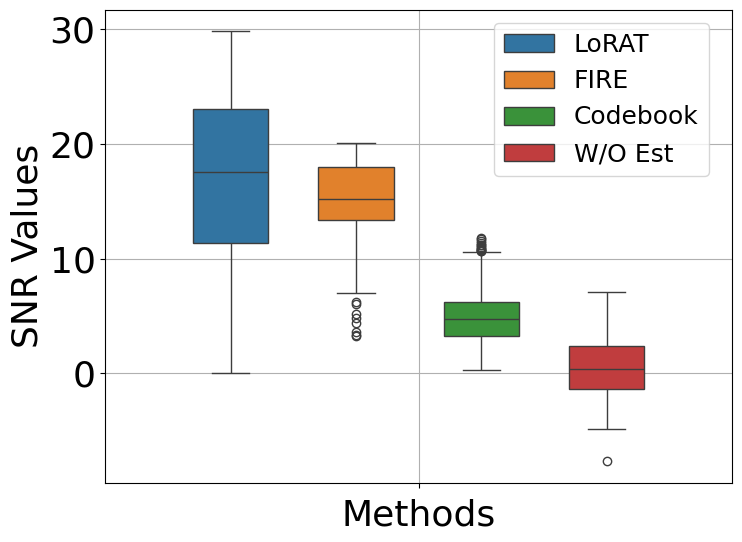

In [83]:
# Convert dictionary data to DataFrame format
from matplotlib.font_manager import font_scalings


plot_data = []
sorted_keys = ['LoRAT', 'data_fire', 'data_codebook', 'NoEst']
method_list = ['LoRAT', 'FIRE', 'Codebook', 'W/O Est']
# sorted_keys = ['JS_Cosine', 'JS_L1', 'JS_L2', 'KL_Cosine', 'KL_L1', 'KL_L2', 'Wasserstein_Cosine', 'Wasserstein_L1', 'Wasserstein_L2']
# method_list = ['JS_Cosine', 'JS_L1', 'JS_L2', 'KL_Cosine', 'KL_L1', 'KL_L2', 'Wasserstein_Cosine', 'Wasserstein_L1', 'Wasserstein_L2']
for i, method in enumerate(sorted_keys):
    if method in methods_snr:
        values = methods_snr[method]
        # Flatten the array if it's 2D
        values_flat = values.flatten()
        plot_data.extend([{'Method': method_list[i], 'SNR': val} for val in values_flat])

# Create DataFrame
df_methods = pd.DataFrame(plot_data)

# Create the plot
plt.figure(figsize=(8, 6))
sns.boxplot(y='SNR', hue='Method', data=df_methods, gap=0.4)  # Reduced width to increase spacing

plt.xlabel('Methods')
plt.ylabel('SNR Values')
plt.grid(True)

# Move legend outside the plot
plt.legend(bbox_to_anchor=(0.6, 1), loc='upper left', fontsize=18)

# Adjust layout to prevent label cutting and accommodate legend
plt.tight_layout()
# plt.ylim(5.5, 27)
# Save and show the plot
plt.savefig('methods_snr_comparison.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [84]:
methods_snr = {}
mapping_methods = ['JS_Cosine', 'JS_L1', 'JS_L2', 'KL_Cosine', 'KL_L1', 'KL_L2',
                    'Wasserstein_Cosine', 'Wasserstein_L1', 'Wasserstein_L2',
                    ]
for method in mapping_methods:
    methods_snr[method] = np.load(f'/mnt/data/WQ/LoRAT/inference/exp_Argos_4_30/FT4_{method}_Client4/all_snr_list.npy')

# Calculate mean and standard deviation for each method
stats = {method: {'mean': np.mean(values), 'std_dev': np.std(values)} for method, values in methods_snr.items()}
print(stats)

{'JS_Cosine': {'mean': 16.36517, 'std_dev': 7.4741898}, 'JS_L1': {'mean': 16.45234, 'std_dev': 7.4610567}, 'JS_L2': {'mean': 16.45235, 'std_dev': 7.461051}, 'KL_Cosine': {'mean': 16.361599, 'std_dev': 7.471742}, 'KL_L1': {'mean': 16.45234, 'std_dev': 7.4610567}, 'KL_L2': {'mean': 16.45234, 'std_dev': 7.461056}, 'Wasserstein_Cosine': {'mean': 16.360954, 'std_dev': 7.468717}, 'Wasserstein_L1': {'mean': 16.45234, 'std_dev': 7.4610567}, 'Wasserstein_L2': {'mean': 16.293653, 'std_dev': 7.391813}}
